In [1]:
from font_rec import FontRecognizer
from tools import *

import matplotlib.pyplot as plt
import logging
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

Using TensorFlow backend.


In [2]:
fontRec = FontRecognizer()

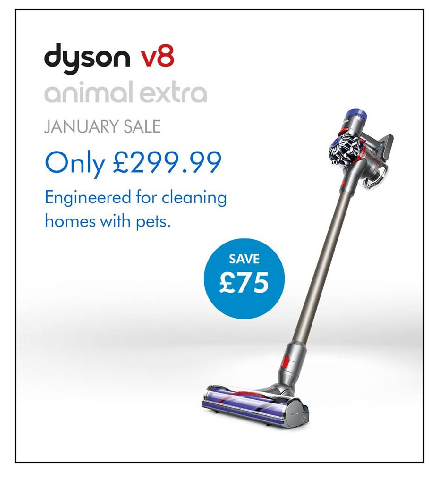

In [4]:
img = read("input/dyson1.png")
drawImage(img)

In [18]:
img.shape[0]

960

In [27]:
def warpBox(image,
            box,
            target_height=None,
            target_width=None,
            return_transform=False):
    """Warp a boxed region in an image given by a set of four points into
    a rectangle with a specified width and height. Useful for taking crops
    of distorted or rotated text.

    Args:
        image: The image from which to take the box
        box: A list of four points starting in the top left
            corner and moving clockwise.
        target_height: The height of the output rectangle
        target_width: The width of the output rectangle
        return_transform: Whether to return the transformation
            matrix with the image.
    """
    box = np.float32(box)
    w, h = img.shape[1], img.shape[0]
    assert (
        (target_width is None and target_height is None)
        or (target_width is not None and target_height is not None)), \
            'Either both or neither of target width and height must be provided.'
    if target_width is None and target_height is None:
        target_width = w
        target_height = h
    scale = min(target_width / w, target_height / h)
    M = cv2.getPerspectiveTransform(src=box,
                                    dst=np.array([[0, 0], [scale * w, 0],
                                                  [scale * w, scale * h],
                                                  [0, scale * h]]).astype('float32'))
    crop = cv2.warpPerspective(image, M, dsize=(int(scale * w), int(scale * h)))
    target_shape = (target_height, target_width, 3) if len(image.shape) == 3 else (target_height,
                                                                                   target_width)
    full = np.zeros(target_shape).astype('uint8')
    full[:crop.shape[0], :crop.shape[1]] = crop
    if return_transform:
        return full, M
    return full

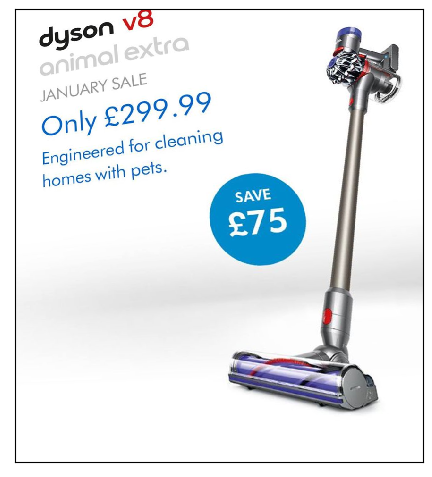

In [28]:
box1 = [[0,0], [864, 200], [664,960], [0,960]]
drawImage(warpBox(img, box1))